## Default Estimator and WoE Binning

#### Importing Libraries and Setting Up the Environment

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset from the CSV file
df=pd.read_csv('../data/final_df.csv')

In [3]:
# Filter unique CustomerID and keep the first occurrence of all columns
df = df.drop_duplicates(subset=['CustomerId'], keep='first')

In [4]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,...,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId1,ChannelId2,ChannelId3,ChannelId5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49+00:00,...,0,0,0,0,0,0,0,0,1,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21+00:00,...,0,0,0,0,0,0,0,0,1,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55+00:00,...,0,0,0,0,0,1,0,0,1,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,0.092096,0.000202,2018-11-15 03:35:10+00:00,...,0,0,0,0,0,0,0,0,1,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,0.092831,0.001012,2018-11-15 03:44:31+00:00,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95232,TransactionId_60908,BatchId_68062,AccountId_2657,SubscriptionId_4361,CustomerId_3076,UGX,256,0.092004,0.000101,2019-02-12 20:03:11+00:00,...,0,0,0,0,0,0,0,0,1,0
95261,TransactionId_26627,BatchId_49104,AccountId_596,SubscriptionId_4336,CustomerId_934,UGX,256,0.092831,0.001012,2019-02-12 21:24:12+00:00,...,0,0,0,0,0,0,0,0,1,0
95454,TransactionId_123513,BatchId_98833,AccountId_557,SubscriptionId_4806,CustomerId_893,UGX,256,0.092518,0.000668,2019-02-13 07:15:33+00:00,...,0,0,0,0,1,0,0,0,1,0
95498,TransactionId_81715,BatchId_88304,AccountId_2476,SubscriptionId_3567,CustomerId_2892,UGX,256,0.092371,0.000506,2019-02-13 07:48:04+00:00,...,0,0,0,0,0,0,0,0,1,0


In [5]:
from scripts.calculate_RFMS_score import RFMSRiskClassifier

### Construct the Default Estimator (Proxy)

- Use RFMS scores to create a boundary between "good" (low-risk) and "bad" (high-risk) customers.
- Visualize customer transactions in the RFMS space to understand where to establish the boundary.
- Based on the RFMS score, assign customers to "good" or "bad" risk categories.

#### Running the Risk Classification Model

In [6]:
# Get the current date dynamically in 'YYYY-MM-DD' format for risk classification
current_date = datetime.now().strftime('%Y-%m-%d')

# Instantiate the RFMSRiskClassifier with the processed DataFrame
classifier = RFMSRiskClassifier(df)

# Run the classification process to obtain the classified DataFrame, WOE (Weight of Evidence) results, and IV (Information Value)
classified_df, woe_results, iv_value = classifier.run(current_date)

#### Displaying the Classified DataFrame

In [7]:
# Filter unique CustomerID and keep the first occurrence of all columns
classified_df = classified_df.drop_duplicates(subset=['CustomerId'], keep='first')
# Print and display the classified DataFrame after running the RFMSRiskClassifier
print("Classified DataFrame:")
classified_df

Classified DataFrame:


,CustomerId,Recency,Frequency,Monetary,Seasonality,RFMS_score,Risk_category
0,CustomerId_4406,1.000000,NaN,0.557522,NaN,0.778761,good
2,CustomerId_4683,1.000000,NaN,0.556944,NaN,0.778472,good
3,CustomerId_988,1.000000,NaN,0.558153,NaN,0.779076,good
5,CustomerId_1432,1.000000,NaN,0.556949,NaN,0.778474,good
6,CustomerId_2858,1.000000,NaN,0.557434,NaN,0.778717,good
...,...,...,...,...,...,...,...
95232,CustomerId_3076,0.011111,NaN,0.556943,NaN,0.284027,bad
95261,CustomerId_934,0.011111,NaN,0.557071,NaN,0.284091,bad
95454,CustomerId_893,0.000000,NaN,0.556973,NaN,0.278486,bad
95498,CustomerId_2892,0.000000,NaN,0.556965,NaN,0.278482,bad


#### Counting the Risk Categories in the Classified DataFrame

In [8]:
# Display the count of each risk category in the classified DataFrame
classified_df.Risk_category.value_counts()

Risk_category
good    2345
bad     1397
Name: count, dtype: int64

#### Visualizing User Segmentation in RFMS Space

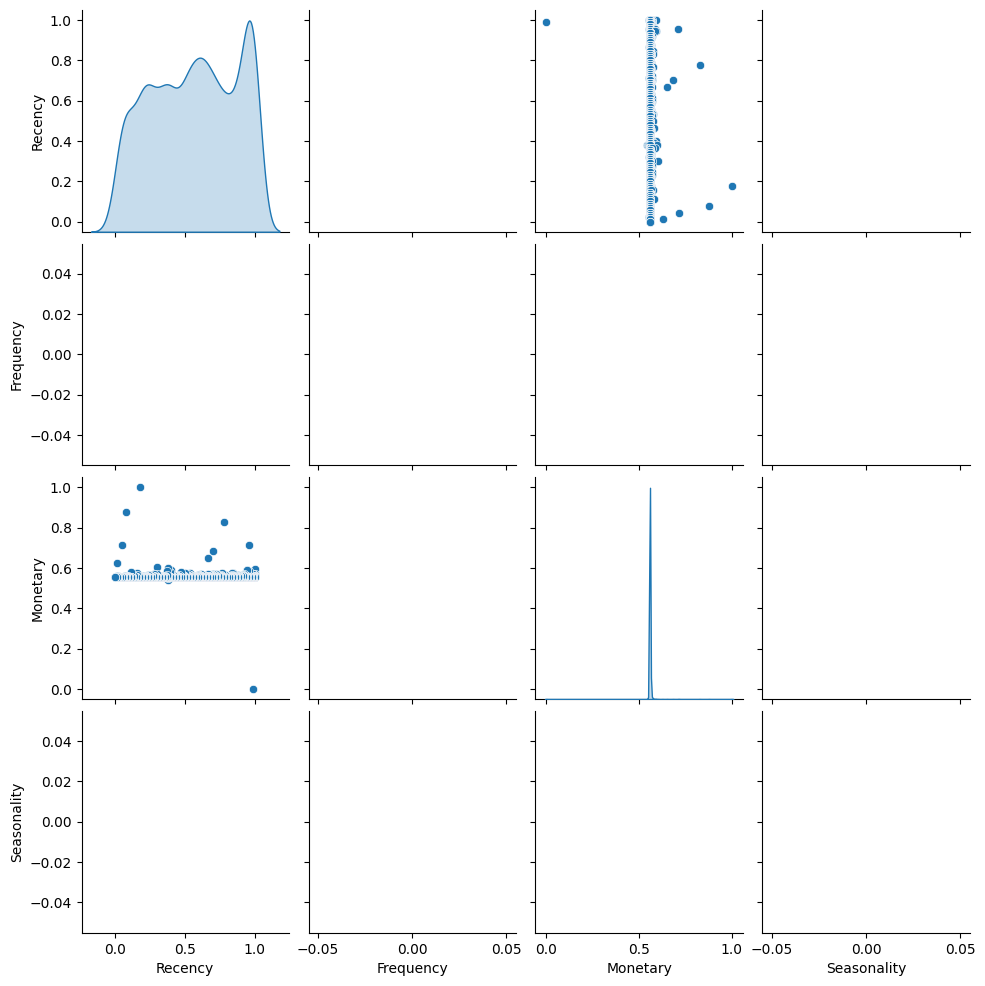

In [9]:
# We have RFMS columns: 'Recency', 'Frequency', 'Monetary', 'Seasonality'
# Create a pairplot to visualize the relationships between these RFMS features in the classified DataFrame
sns.pairplot(classified_df[['Recency', 'Frequency', 'Monetary', 'Seasonality']], diag_kind='kde')

# Display the plot
plt.show()

### Perform Weight of Evidence (WoE) Binning

- Apply WoE binning to better separate customers into risk categories based on their RFMS scores.
- WoE binning helps identify which groups of RFMS scores are more strongly associated with default risk.

##### Displaying Weight of Evidence (WoE) Results

In [10]:
# Print and display the WoE results obtained from the RFMSRiskClassifier
print("\nWoE Results:")
woe_results


WoE Results:


Risk_category,bad,good,RFMS_bin,total_good,total_bad,good_dist,bad_dist,WoE,IV
0,749,0,"(0.277, 0.4]",2345,1397,4.264392e-08,5.361489e-01,-16.347038,8.764446
1,648,100,"(0.4, 0.517]",2345,1397,4.264396e-02,4.638511e-01,-2.386678,1.005286
2,0,748,"(0.517, 0.612]",2345,1397,3.189766e-01,7.158196e-08,15.309785,4.883462
3,0,748,"(0.612, 0.729]",2345,1397,3.189766e-01,7.158196e-08,15.309785,4.883462
4,0,749,"(0.729, 0.834]",2345,1397,3.194030e-01,7.158196e-08,15.311121,4.890417


#### Displaying Information Value (IV)

In [11]:
# Print the Information Value (IV) to assess the predictive power of the features
print(f"\nInformation Value (IV): {iv_value}")


Information Value (IV): 24.427072572443535


#### Plotting Weight of Evidence (WoE) Results

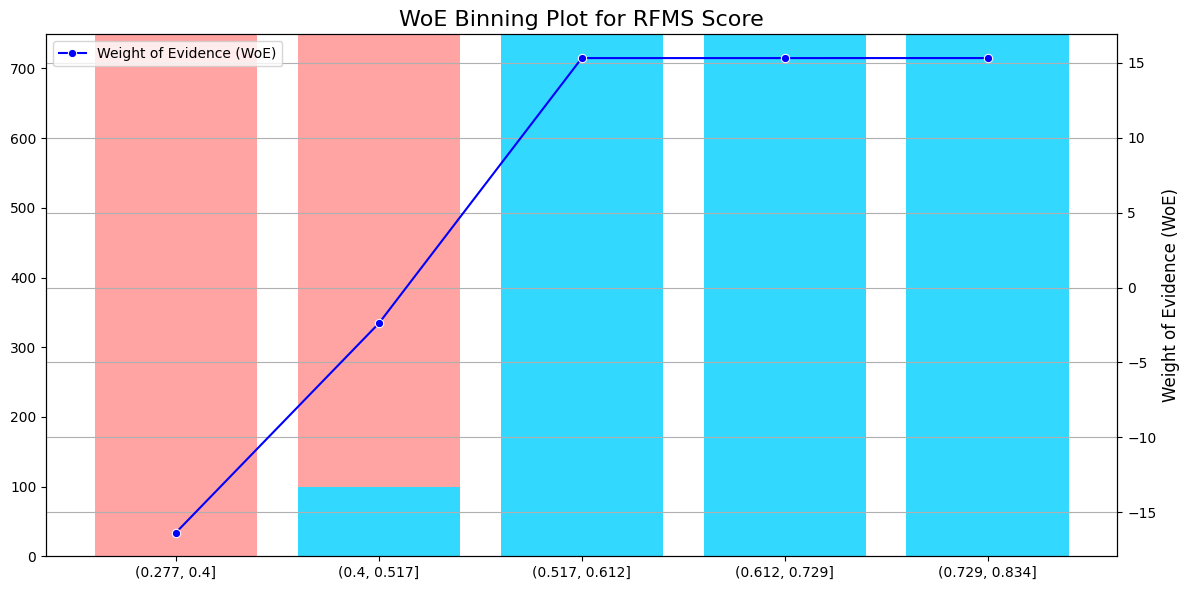

In [12]:
# Call the method to plot the WoE results for better visualization and interpretation
classifier.plot_woe(woe_results)

### Dropping Features

In the process of preparing the dataset for the credit scoring model, the following features were identified and dropped for the reasons outlined below:

1. **Identifiers**: 
   - **`TransactionId`, `BatchId`, `AccountId`, `SubscriptionId`**: These columns serve as unique identifiers for transactions and accounts but do not provide any predictive value for the model.

2. **Non-Informative Features**: 
   - **`CurrencyCode`, `CountryCode`**: These features have unique values for each entry, making them non-informative for the modeling process.

3. **Redundant Metrics**: 
   - **`Amount`, `Value`, `Avg_Transaction_Amount`, `Total_Transaction_Amount`**: The `Total_Transaction_Amount` effectively captures the transaction value, rendering these columns redundant.

4. **Time-Based Features**: 
   - **`Transaction_Hour`, `Transaction_Day`, `Transaction_Month`, `Transaction_Year`**: These columns were dropped as they do not contribute unique information relevant to the credit scoring analysis.

5. **Transaction Timestamp**: 
   - **`TransactionStartTime`**: This feature was removed as it is not needed for the modeling process.

By dropping these features, the dataset is streamlined, improving model efficiency and interpretability while retaining `CustomerId` for merging purposes.


In [13]:
# drop features
df = df.drop(['TransactionId','BatchId','AccountId','SubscriptionId','CurrencyCode','CountryCode','Amount','TransactionStartTime',
              'Value','Avg_Transaction_Amount','Transaction_Hour','Transaction_Day', 'Transaction_Month', 'Transaction_Year'], axis=1)

In [15]:
# Drop unnecessary columns from classified_df before merging
classified_df = classified_df.drop(columns=['Recency', 'Frequency', 'Monetary', 'Seasonality', 'RFMS_score'],axis=1)

#### Merging Filtered Data and Cleaning Up Unnecessary Columns

In [17]:
# Now merge the filtered classified_df with the original df
final_merged_df = df.merge(classified_df, on='CustomerId')
# Drop the unwanted columns after merging
final_merged_df = final_merged_df.drop(columns=['Recency', 'Frequency', 'Monetary', 'Seasonality', 'RFMS_score', 'Risk_category_x', 'RFMS_bin'], axis=1, errors='ignore')
# Rename the Risk_category_y column to Risk_category
final_merged_df = final_merged_df.rename(columns={'Risk_category_y': 'Risk_category'})

In [18]:
# display sample data from the merged dataframe
final_merged_df.head(5)

,CustomerId,PricingStrategy,FraudResult,Total_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,ProviderId1,ProviderId2,ProviderId3,ProviderId4,...,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId1,ChannelId2,ChannelId3,ChannelId5,Risk_category
0,CustomerId_4406,2,0,0.557522,119,0.000919,0,0,0,0,...,0,0,0,0,0,0,0,1,0,good
1,CustomerId_4683,2,0,0.556944,2,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,good
2,CustomerId_988,2,0,0.558153,38,0.005187,1,0,0,0,...,0,0,0,0,1,0,0,1,0,good
3,CustomerId_1432,2,0,0.556949,1,0.005449,0,0,0,0,...,0,0,0,0,0,0,0,1,0,good
4,CustomerId_2858,4,0,0.557434,29,0.001660,0,0,0,0,...,0,0,0,0,0,0,0,1,0,good


#### Saving the Merged Data to CSV

In [19]:
# save merged data
file_path='../data'
classifier.save_merged_data(final_merged_df, output_file='final_merged_data', file_path=file_path)

Merged data saved to ../data/final_merged_data.csv


### RFMS Risk Classification with WoE Binning

This notebook implements an RFMS (Recency, Frequency, Monetary, Seasonality) model for customer risk classification and applies Weight of Evidence (WoE) binning to assess risk categories.

## Key Steps:

1. **Feature Calculation:**
   - **Recency**: Days since last transaction.
   - **Frequency**: Number of transactions per customer.
   - **Monetary**: Total transaction amount per customer.
   - **Seasonality**: Unique months of customer transactions.

2. **RFMS Normalization:**
   - Normalize RFMS features for consistency.

3. **Risk Classification:**
   - Calculate an RFMS score and classify customers as 'good' or 'bad' based on a threshold.

4. **WoE Binning & IV Calculation:**
   - Perform WoE binning for risk segmentation.
   - Calculate Information Value (IV) to evaluate feature predictive power.

5. **Data Export:**
   - Save the final classified dataset as a CSV.

### Conclusion:
The RFMS model, combined with WoE binning, provides a method to classify customers based on their transaction behavior and determine their risk level, aiding in better decision-making.
